<a href="https://www.kaggle.com/code/rahulbanerj24/cnn-with-image-classification?scriptVersionId=181492740" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install opencv-python
!pip install tensorflow
!pip install keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [2]:
import cv2
import pandas as pd
import io

In [6]:
A=cv2.imread('/kaggle/input/image-samples/Example_3.jpg')

In [7]:
A.shape

(28, 28, 3)

In [12]:
import matplotlib.pyplot as plt
#plt.imshow(A)

In [3]:
#Data Collection
from keras.datasets import mnist


2024-06-04 15:44:47.603285: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-04 15:44:47.603445: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-04 15:44:47.790153: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [8]:
#X train has an image as a matrix and y_train has a number
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [13]:
x_train.shape

(60000, 28, 28)

In [17]:
x_test.shape

(10000, 28, 28)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

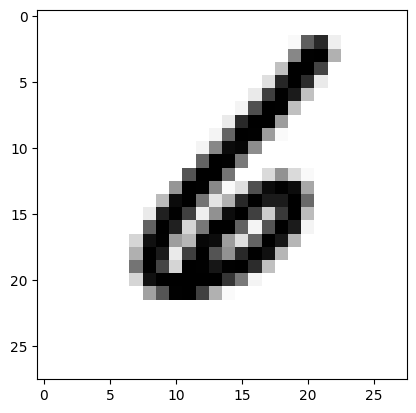

In [14]:
#Image Visualisation
plt.imshow(x_train[999],plt.get_cmap('binary'))

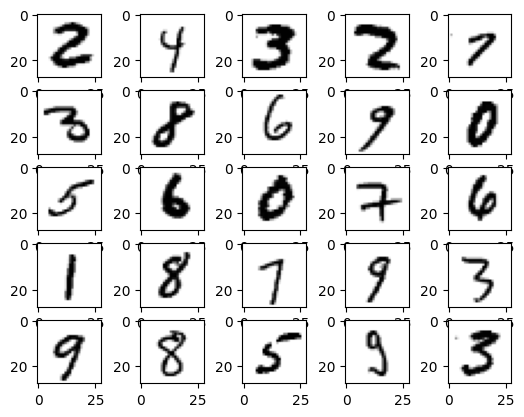

In [15]:
x=1
for i in range(25,50):
    plt.subplot(5,5,x)
    plt.imshow(x_train[i],plt.get_cmap('binary'))
    x+=1

In [ ]:
#Start Processing

In [16]:
#Scaling .As the pixel value is from 0 to 255 so we will divide by 255 so the all the number will be in the range of 0-1
x_train=x_train/255
x_test=x_test/255

In [18]:
#Encoding
from keras.utils import to_categorical
y_train1=to_categorical(y_train)
y_test1=to_categorical(y_test)

In [19]:
#Build Model
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout,Convolution2D,MaxPooling2D,Flatten

In [79]:
nn=Sequential()

In [80]:
#16 forms of the same image
nn.add(Convolution2D(filters=16,kernel_size=(3,3),input_shape=(28,28,1)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.1))

nn.add(Convolution2D(filters=16,kernel_size=(3,3)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.1))

nn.add(Convolution2D(filters=16,kernel_size=(3,3)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.1))

nn.add(Flatten())

nn.add(Dense(1000,activation='relu'))
nn.add(Dense(1000,activation='relu'))
nn.add(Dense(1000))

nn.add(Dense(10,activation='softmax'))

In [81]:
#Compile
nn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [82]:
#Add Callbacks
from keras.callbacks import EarlyStopping
Early=EarlyStopping(monitor='val_loss',patience=7)

In [83]:
#Fit the model
hist=nn.fit(x_train,y_train1,validation_split=0.2,callbacks=[Early],epochs=7)

Epoch 1/7
1500/1500 [==============================] - 59s 38ms/step - loss: 0.4614 - accuracy: 0.8555 - val_loss: 0.1722 - val_accuracy: 0.9461
Epoch 2/7
1500/1500 [==============================] - 55s 37ms/step - loss: 0.2617 - accuracy: 0.9216 - val_loss: 0.1185 - val_accuracy: 0.9646
Epoch 3/7
1500/1500 [==============================] - 55s 37ms/step - loss: 0.2107 - accuracy: 0.9368 - val_loss: 0.1270 - val_accuracy: 0.9623
Epoch 4/7
1500/1500 [==============================] - 56s 37ms/step - loss: 0.1827 - accuracy: 0.9461 - val_loss: 0.0906 - val_accuracy: 0.9726
Epoch 5/7
1500/1500 [==============================] - 57s 38ms/step - loss: 0.1669 - accuracy: 0.9492 - val_loss: 0.0837 - val_accuracy: 0.9748
Epoch 6/7
1500/1500 [==============================] - 55s 37ms/step - loss: 0.1557 - accuracy: 0.9536 - val_loss: 0.0839 - val_accuracy: 0.9760
Epoch 7/7
1500/1500 [==============================] - 55s 37ms/step - loss: 0.1482 - accuracy: 0.9546 - val_loss: 0.0785 - val_ac

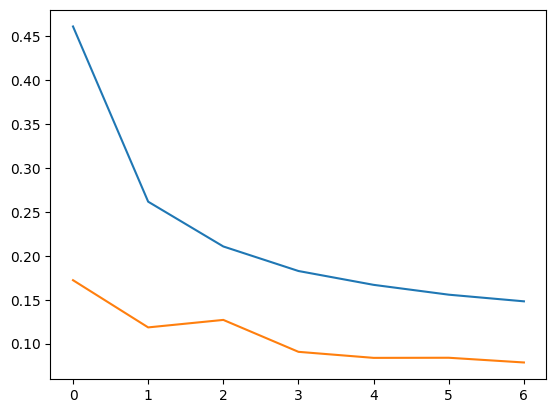

In [84]:
#Visulaise the result
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

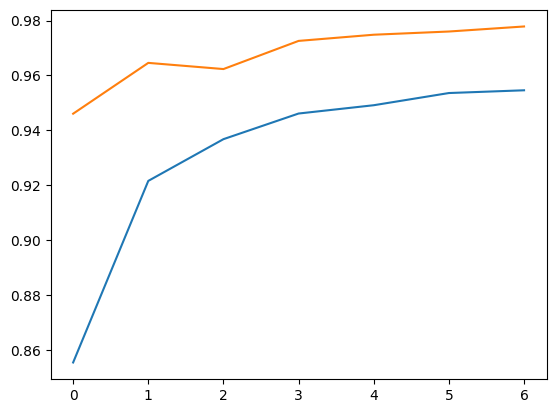

In [85]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [86]:
# Evaluation Of Training data
from sklearn.metrics import accuracy_score,classification_report,multilabel_confusion_matrix
import numpy as np

In [87]:
y_pred_train=nn.predict(x_train)
y_pred_train[0]

1875/1875 [==============================] - 20s 10ms/step


array([4.4461491e-04, 1.0633548e-03, 4.9795414e-04, 1.1582047e-01,
       6.5451121e-04, 8.5900742e-01, 1.3350940e-03, 4.4194408e-04,
       1.3787013e-02, 6.9475994e-03], dtype=float32)

In [88]:
y_pred_train1=np.argmax(y_pred_train,axis=-1)
y_pred_train1

array([5, 0, 4, ..., 5, 6, 8])

In [89]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [90]:
acc=accuracy_score(y_pred_train1,y_train)
clf=classification_report(y_pred_train1,y_train)
cnf=multilabel_confusion_matrix(y_pred_train1,y_train)

print('Accuracy:',acc)
print('Confusion matrix:\n',cnf)
print('classification Report:\n',clf)

Accuracy: 0.9798333333333333
Confusion matrix:
 [[[54031    75]
  [   46  5848]]

 [[53133    39]
  [  125  6703]]

 [[53932   259]
  [  110  5699]]

 [[53709    95]
  [  160  6036]]

 [[54067   129]
  [   91  5713]]

 [[54519   138]
  [   60  5283]]

 [[53951    47]
  [  131  5871]]

 [[53462    72]
  [  273  6193]]

 [[54038   155]
  [  111  5696]]

 [[53948   201]
  [  103  5748]]]
classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5894
           1       0.99      0.98      0.99      6828
           2       0.96      0.98      0.97      5809
           3       0.98      0.97      0.98      6196
           4       0.98      0.98      0.98      5804
           5       0.97      0.99      0.98      5343
           6       0.99      0.98      0.99      6002
           7       0.99      0.96      0.97      6466
           8       0.97      0.98      0.98      5807
           9       0.97      0.98      0.97    

In [ ]:
#Testing Data Analysis

In [91]:
ts_pred=nn.predict(x_test)
ts_pred

313/313 [==============================] - 3s 11ms/step


array([[2.2306583e-08, 4.3639364e-08, 2.8865284e-07, ..., 9.9999946e-01,
        9.6265787e-11, 3.3352847e-09],
       [4.2136039e-06, 3.8831367e-05, 9.9979329e-01, ..., 6.2730353e-05,
        1.3465059e-06, 3.6834898e-08],
       [5.2545324e-09, 9.9999982e-01, 2.2803022e-08, ..., 2.7839571e-09,
        2.7300597e-08, 1.6111231e-09],
       ...,
       [1.1821467e-09, 1.4316531e-09, 1.8728670e-09, ..., 7.7310647e-09,
        1.7176210e-06, 6.8068351e-07],
       [3.2280113e-05, 6.6081360e-05, 7.0174628e-06, ..., 7.0174727e-05,
        9.4814348e-04, 2.5996132e-04],
       [2.5740421e-06, 3.5677749e-06, 5.9161988e-07, ..., 3.3241459e-08,
        6.2544364e-06, 4.2489745e-07]], dtype=float32)

In [92]:
y_pred_test=np.argmax(ts_pred,axis=-1)
y_pred_test

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_test

In [93]:
#Testing Accuracy
acc1=accuracy_score(y_pred_test,y_test)
clf1=classification_report(y_pred_test,y_test)
cnf1=multilabel_confusion_matrix(y_pred_test,y_test)

print('Accuracy:',acc1)
print('Confusion matrix:\n',cnf1)
print('classification Report:\n',clf1)

Accuracy: 0.9772
Confusion matrix:
 [[[9010   20]
  [  10  960]]

 [[8842    3]
  [  23 1132]]

 [[8947   41]
  [  21  991]]

 [[8954   13]
  [  36  997]]

 [[9003   21]
  [  15  961]]

 [[9100   24]
  [   8  868]]

 [[9018   14]
  [  24  944]]

 [[8913   19]
  [  59 1009]]

 [[9010   28]
  [  16  946]]

 [[8975   45]
  [  16  964]]]
classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       970
           1       1.00      0.98      0.99      1155
           2       0.96      0.98      0.97      1012
           3       0.99      0.97      0.98      1033
           4       0.98      0.98      0.98       976
           5       0.97      0.99      0.98       876
           6       0.99      0.98      0.98       968
           7       0.98      0.94      0.96      1068
           8       0.97      0.98      0.98       962
           9       0.96      0.98      0.97       980

    accuracy                           0.98 

In [ ]:
#Unseen Data Prediction

In [127]:
img=cv2.imread('/kaggle/input/image-samples/Example_3.jpg',cv2.IMREAD_GRAYSCALE)

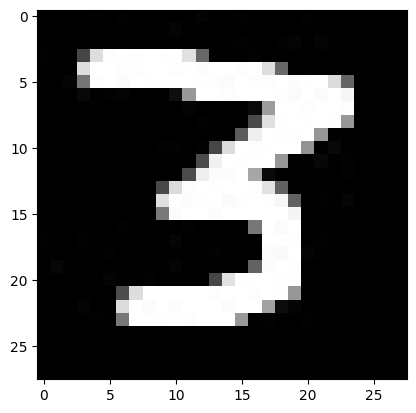

In [128]:
plt.imshow(img,plt.get_cmap('binary'))

In [129]:
img1=~img

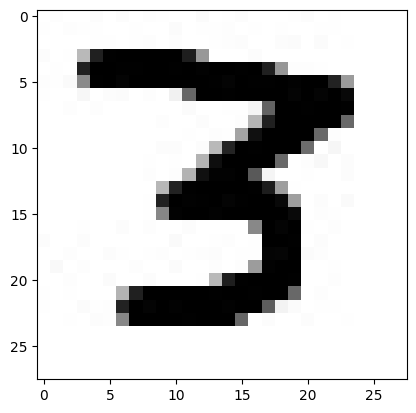

In [130]:
plt.imshow(img1,plt.get_cmap('binary'))

In [131]:
img1=img1/255


In [132]:
ar1=np.array([img1])
ar1

array([[[0.        , 0.00784314, 0.        , 0.        , 0.01176471,
         0.        , 0.01176471, 0.        , 0.00784314, 0.00392157,
         0.        , 0.        , 0.01568627, 0.        , 0.00392157,
         0.01176471, 0.        , 0.        , 0.        , 0.00392157,
         0.01176471, 0.        , 0.00392157, 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.00392157, 0.        , 0.00784314, 0.00392157, 0.00392157,
         0.        , 0.        , 0.00392157, 0.        , 0.        ,
         0.01568627, 0.        , 0.00392157, 0.00392157, 0.00784314,
         0.        , 0.00392157, 0.        , 0.00392157, 0.        ,
         0.        , 0.00392157, 0.00392157, 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.00392157,
         0.00392157, 0.        , 0.00392157, 0.00784314, 0.        ,
         0.00784314, 0.        , 0.        , 0.00392157, 0.00784314,
         0.

In [133]:
x=nn.predict(ar1)
x

1/1 [==============================] - 0s 26ms/step


array([[1.3657758e-13, 3.1351050e-10, 1.2921294e-09, 9.9999988e-01,
        8.7246058e-11, 6.4224153e-08, 2.0957160e-14, 1.0512514e-09,
        1.0783261e-09, 3.4719495e-08]], dtype=float32)

In [134]:
np.argmax(x)

3